In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator


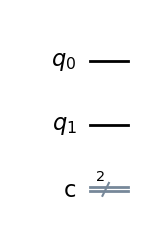

In [3]:
qc = QuantumCircuit(2,2)
qc.draw("mpl")

Here we are initilzing with Normal Not gate 

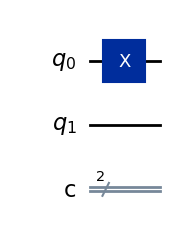

In [4]:
qc.x(0)
qc.draw("mpl")

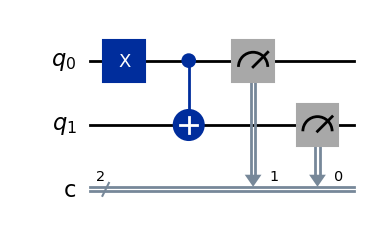

In [5]:
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
qc.measure([0,1],[1,0])
qc.draw("mpl")

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",token=open("token.txt","r").read()[:-1])

In [6]:
for i in service.backends():
    qbit_count = len(i.properties().qubits)
    print(f'Qutuam computer name :  {i} and qbit in it : {qbit_count}')

Qutuam computer name :  <IBMBackend('ibm_brisbane')> and qbit in it : 127
Qutuam computer name :  <IBMBackend('ibm_kyiv')> and qbit in it : 127
Qutuam computer name :  <IBMBackend('ibm_sherbrooke')> and qbit in it : 127


In [21]:

# backend = service.backend("ibm_kyiv")
# service.jobs(backend_name=backend)

backend=service.least_busy(simulator=False, operational=True)

In [13]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [22]:
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 500
 
 
mapped_observables = [
    observable.apply_layout(qc.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(qc, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: cwhsmj20r6b0008pqakg


In [28]:
result = job.result()
print(result)

PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(6,), dtype=float64>), stds=np.ndarray(<shape=(6,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(6,), dtype=float64>), shape=(6,)), metadata={'shots': 512, 'target_precision': 0.044721359549995794, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 8})], metadata={'dynamical_decoupling': {'enable': False, 'sequence_type': 'XX', 'extra_slack_distribution': 'middle', 'scheduling_method': 'alap'}, 'twirling': {'enable_gates': False, 'enable_measure': True, 'num_randomizations': 'auto', 'shots_per_randomization': 'auto', 'interleave_randomizations': True, 'strategy': 'active-accum'}, 'resilience': {'measure_mitigation': True, 'zne_mitigation': False, 'pec_mitigation': False}, 'version': 2})


In [29]:
pub_result = job.result()[0]
print(pub_result)

PubResult(data=DataBin(evs=np.ndarray(<shape=(6,), dtype=float64>), stds=np.ndarray(<shape=(6,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(6,), dtype=float64>), shape=(6,)), metadata={'shots': 512, 'target_precision': 0.044721359549995794, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 8})


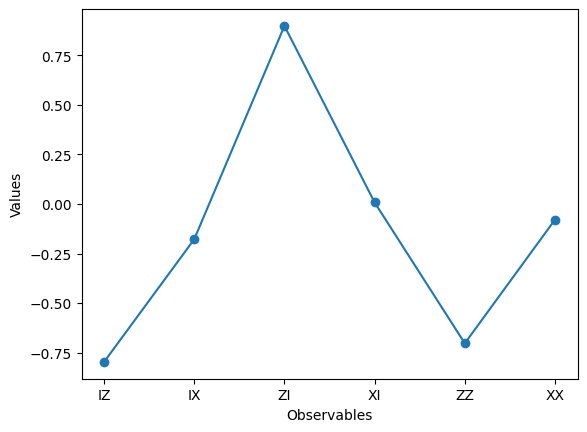

In [27]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()